# DETECT SPAM E-MAILS USING NAIVE BAYES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('emails.csv')

In [3]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

# EDA

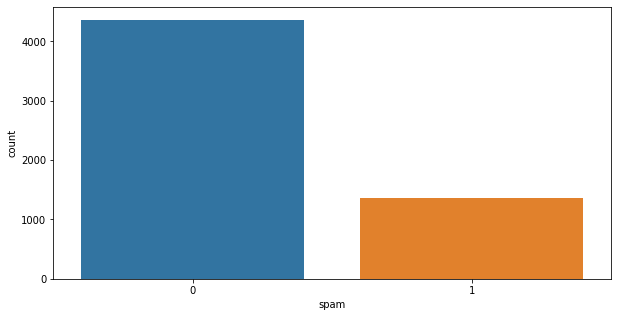

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data['spam'])

In [7]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
ham  = data[data['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
spam = data[data['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


# Cleaning 

In [10]:
import re #remove punctuations
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #and, in, the, a ... etc
from nltk.stem.porter import PorterStemmer #change verbs 'liked to like'.. etc or simplifying each word by root of word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus = []
for i in range(0, 5728):
    text = re.sub('[^a-zA-Z]', ' ', data['text'][i]) #replace anything that is not a letter like "" , ... with space
     
    text = text.lower() #all letters to lower-case
    text = text.split() #splitting review in diferent words
    
    ps = PorterStemmer()
    stopwords1 = stopwords.words('english')
    
    text = [ps.stem(f) for f in text if not f in set(stopwords1)]
    text = ' '.join(text) #separating words with space and joining
    corpus.append(text)

In [12]:
#corpus

# Vectorizing

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer()

In [15]:
textVect = cv.fit_transform(data['text'])

In [16]:
textVect.shape

(5728, 37303)

# NAIVE BAYES

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
model = MultinomialNB()

In [19]:
x = textVect

In [20]:
y = data['spam'].values

# Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [23]:
model.fit(xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

###### model accuracy

In [24]:
model.score(xtest, ytest)

0.9912739965095986

# Model Evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
predict = model.predict(xtest)

### Classification Report

In [27]:
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       876
           1       0.98      0.98      0.98       270

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



### Confusion Matrix

In [28]:
cm = confusion_matrix(ytest, predict)

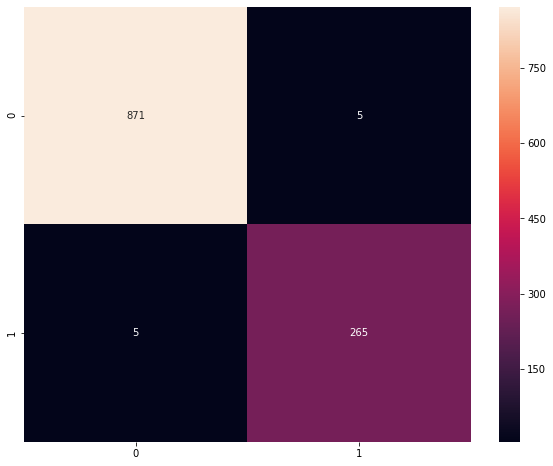

In [29]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True, fmt='g')

### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
print(cross_val_score(model, xtrain, ytrain, cv=10))

[0.98910675 0.9869281  0.98471616 0.98471616 0.98908297 0.99344978
 0.98471616 0.98908297 0.98908297 0.98689956]


# Testing

In [32]:
test = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testVect = cv.transform(test)


In [33]:
test_predict = model.predict(testVect)
test_predict

array([1, 0], dtype=int64)

In [34]:
test2 = ['Book now our free course for 10 days. Its easy just sign up now. Free Free']
testVect2 = cv.transform(test2)

In [35]:
test_predict2 = model.predict(testVect2)
test_predict2

array([1], dtype=int64)

In [36]:
test3 = ['I am on my way']
testVect3 = cv.transform(test3)

In [37]:
test_predict3 = model.predict(testVect3)
test_predict3

array([0], dtype=int64)